# HEX algorithm **Kopuru Vespa Velutina Competition**

Purpose: to predict the yearly amount of Vespa Velutina Wasp nests in each of Biscay's municipalities.

Output: WaspBusters' prediction for submission to Kopuru *(WaspBusters_2021MMDD_batchNAME.csv)*

@authors:
* mario.bejar@student.ie.edu
* pedro.geirinhas@student.ie.edu
* a.berrizbeitia@student.ie.edu
* pcasaverde@student.ie.edu

## Get the data

In [1]:
# Base packages -----------------------------------
import pandas as pd
import numpy as np

# Visualization -----------------------------------
from matplotlib import pyplot

# Scaling data ------------------------------------
from sklearn import preprocessing

# Linear Regression -------------------------------
from statsmodels.formula.api import ols
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# SKLearn -----------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score

# Naive Bayes -------------------------------------
from sklearn.naive_bayes import GaussianNB

In [2]:
QUEEN_train = pd.read_csv('WBds03_QUEENtrain.csv', sep=',')
QUEEN_predict = pd.read_csv('WBds03_QUEENpredict.csv', sep=',')

## Ready the data

In [3]:
QUEEN_train.columns

Index(['year_x', 'municip_name', 'species', 'municip_code', 'year_offset',
       'waspbust_id', 'colonies_amount', 'food_fruit', 'food_apple',
       'food_txakoli', 'food_kiwi', 'food_pear', 'food_blueberry',
       'food_raspberry', 'station_code', 'codigo', 'freez', 'hum', 'lev_max',
       'lev_mid', 'lev_min', 'rain', 'rain_1mm', 'rain_cum', 'rain_max_10',
       'rain_max_day', 'sun', 'temp_avg', 'temp_max_abs', 'temp_max_avg',
       'temp_min_abs', 'wind_avg', 'wind_max', 'wind_max_avg', 'population'],
      dtype='object')

In [4]:
QUEEN_predict.columns

Index(['year_x', 'municip_name', 'species', 'municip_code', 'year_offset',
       'colonies_amount', 'food_fruit', 'food_apple', 'food_txakoli',
       'food_kiwi', 'food_pear', 'food_blueberry', 'food_raspberry',
       'station_code', 'freez', 'hum', 'lev_max', 'lev_mid', 'lev_min', 'rain',
       'rain_1mm', 'rain_cum', 'rain_max_10', 'rain_max_day', 'sun',
       'temp_avg', 'temp_max_abs', 'temp_max_avg', 'temp_min_abs', 'wind_avg',
       'wind_max', 'wind_max_avg', 'population'],
      dtype='object')

In [33]:
# making the dataframe model-ready:

#QUEEN_train['year_offset'] = pd.to_datetime(QUEEN_train['year_offset'])
#QUEEN_train['nest_foundDate'] = pd.to_datetime(QUEEN_train['nest_foundDate'])
#QUEEN_train['municip_name'] = QUEEN_train.municip_name.astype('category')
#QUEEN_train['municip_code'] = QUEEN_train.municip_code.astype(int) 
#QUEEN_train['species'] = QUEEN_train.species.astype('category')
#QUEEN_train['nest_locType'] = QUEEN_train.nest_locType.astype('category')

#QUEEN_train['nest_status'] = QUEEN_train.nest_status.astype('category')

#QUEEN_train['station_code'] = QUEEN_train.station_code.astype('category')
#QUEEN_train['month'] = QUEEN_train.month.astype('category')

#QUEEN_train.dtypes

In [7]:
QUEEN_predict.head()

,year_x,municip_name,species,municip_code,year_offset,colonies_amount,food_fruit,food_apple,food_txakoli,food_kiwi,...,rain_max_day,sun,temp_avg,temp_max_abs,temp_max_avg,temp_min_abs,wind_avg,wind_max,wind_max_avg,population
0,2020,AbadiÃ±o,Vespa Velutina,48001,2019,160.0,0.0,0.0,0.0,0.0,...,90.900000,12.516131,13.341667,39.700000,26.600000,3.400000,10.741491,75.764936,40.237987,7.658
1,2020,Abanto y CiÃ©rvana-Abanto Zierbena,Vespa Velutina,48002,2019,161.0,0.0,0.0,0.0,0.0,...,51.600000,12.506406,14.412870,39.800000,24.900000,5.000000,12.200000,117.700000,69.700000,9.471
2,2020,Ajangiz,Vespa Velutina,48911,2019,0.0,17.0,1.0,3.0,15.0,...,72.300000,12.527298,13.816667,40.200000,26.500000,2.500000,10.935155,75.613647,40.304712,464.000
3,2020,Alonsotegi,Vespa Velutina,48912,2019,200.0,7.0,0.0,1.0,0.0,...,29.828186,12.544780,12.969818,26.722881,18.224141,8.396147,11.086672,74.898141,40.183610,2.879
4,2020,Amorebieta-Etxano,Vespa Velutina,48003,2019,267.0,0.0,0.0,0.0,0.0,...,84.400000,12.523053,13.466667,39.300000,25.900000,3.200000,10.742568,75.635301,40.203758,19.529


## Determine Feature Importance

In [5]:
QUEEN_train_X = QUEEN_train.drop(columns = ['waspbust_id', 'species', 'municip_name', 'station_code', 'codigo'])
QUEEN_train_X

,year_x,municip_code,year_offset,colonies_amount,food_fruit,food_apple,food_txakoli,food_kiwi,food_pear,food_blueberry,...,rain_max_day,sun,temp_avg,temp_max_abs,temp_max_avg,temp_min_abs,wind_avg,wind_max,wind_max_avg,population
0,2018,48001.0,2017,160.0,0.0,0.0,0.0,0.0,0.0,0.0,...,63.100000,12.529042,13.283333,38.400000,26.100000,0.800000,10.868514,82.102336,40.190008,7.533
1,2018,48002.0,2017,161.0,0.0,0.0,0.0,0.0,0.0,0.0,...,74.900000,11.183333,13.433333,34.100000,23.600000,2.900000,11.541667,142.900000,59.400000,9.545
2,2018,48911.0,2017,0.0,17.0,1.0,3.0,15.0,0.0,0.0,...,47.000000,12.526743,14.033333,37.800000,25.600000,2.000000,11.073450,80.263148,40.287502,482.000
3,2018,48912.0,2017,200.0,7.0,0.0,1.0,0.0,0.0,0.0,...,29.828186,12.544780,12.969818,26.722881,18.224141,8.396147,11.086672,74.898141,40.183610,2.903
4,2018,48003.0,2017,267.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.200000,12.534820,13.575000,38.400000,25.400000,0.600000,11.087579,80.847890,40.278641,19.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,2019,48097.0,2018,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,52.900000,11.650000,14.395194,37.900000,26.300000,2.600000,9.591667,96.500000,58.900000,1.614
215,2019,48024.0,2018,15.0,64.0,5.0,2.0,3.0,0.0,0.0,...,57.900000,12.541535,10.125000,32.000000,22.900000,-0.100000,11.484673,80.038416,40.311726,1.250
216,2019,48025.0,2018,0.0,70.0,5.0,5.0,1.0,0.0,0.0,...,27.344513,12.324835,11.025000,33.700000,23.300000,0.300000,20.425000,112.000000,75.200000,1.073
217,2019,48913.0,2018,0.0,13.0,0.0,0.0,4.0,0.0,0.0,...,41.300000,12.426453,15.058333,34.300000,23.600000,5.200000,17.483333,125.300000,78.300000,1.490


In [6]:
QUEEN_train_X.dtypes

year_x               int64
municip_code       float64
year_offset          int64
colonies_amount    float64
food_fruit         float64
food_apple         float64
food_txakoli       float64
food_kiwi          float64
food_pear          float64
food_blueberry     float64
food_raspberry     float64
freez              float64
hum                float64
lev_max            float64
lev_mid            float64
lev_min            float64
rain               float64
rain_1mm           float64
rain_cum           float64
rain_max_10        float64
rain_max_day       float64
sun                float64
temp_avg           float64
temp_max_abs       float64
temp_max_avg       float64
temp_min_abs       float64
wind_avg           float64
wind_max           float64
wind_max_avg       float64
population         float64
dtype: object

In [8]:
QUEEN_train_Y = QUEEN_train['waspbust_id']
QUEEN_train_Y

0       54
1       92
2       19
3       26
4      125
      ... 
214     10
215     22
216     17
217      6
218      5
Name: waspbust_id, Length: 219, dtype: int64

In [9]:
# Scale the datasets using MinMaxScaler

scalators = QUEEN_train_X.columns
QUEEN_train_X[scalators] = preprocessing.minmax_scale(QUEEN_train_X[scalators])

In [10]:
QUEEN_train_X

,year_x,municip_code,year_offset,colonies_amount,food_fruit,food_apple,food_txakoli,food_kiwi,food_pear,food_blueberry,...,rain_max_day,sun,temp_avg,temp_max_abs,temp_max_avg,temp_min_abs,wind_avg,wind_max,wind_max_avg,population
0,0.0,0.000000,0.0,0.235294,0.000000,0.00,0.000000,0.000000,0.0,0.0,...,0.405291,0.833940,0.623088,0.951129,0.711083,0.254998,0.291769,0.147691,0.095833,0.006558
1,0.0,0.001094,0.0,0.236765,0.000000,0.00,0.000000,0.000000,0.0,0.0,...,0.538200,0.188000,0.648122,0.600884,0.485367,0.460958,0.323311,0.635634,0.443841,0.008590
2,0.0,0.995624,0.0,0.000000,0.061818,0.02,0.022727,0.340909,0.0,0.0,...,0.223950,0.832837,0.748261,0.902257,0.665940,0.372690,0.301372,0.132931,0.097600,0.485837
3,0.0,0.996718,0.0,0.294118,0.025455,0.00,0.007576,0.000000,0.0,0.0,...,0.030537,0.841494,0.570762,0.000000,0.000000,1.000000,0.301992,0.089873,0.095718,0.001881
4,0.0,0.002188,0.0,0.392647,0.000000,0.00,0.000000,0.000000,0.0,0.0,...,0.305047,0.836714,0.671766,0.951129,0.647883,0.235383,0.302034,0.137624,0.097439,0.018283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,1.0,0.105033,1.0,0.000000,0.029091,0.00,0.000000,0.000000,0.0,0.0,...,0.290404,0.412000,0.808655,0.910402,0.729141,0.431536,0.231941,0.263242,0.434783,0.000579
215,1.0,0.025164,1.0,0.022059,0.232727,0.10,0.015152,0.068182,0.0,0.0,...,0.346721,0.839937,0.095967,0.429834,0.422167,0.166730,0.320641,0.131127,0.098039,0.000211
216,1.0,0.026258,1.0,0.000000,0.254545,0.10,0.037879,0.022727,0.0,0.0,...,0.002562,0.735921,0.246175,0.568303,0.458281,0.205960,0.739555,0.387640,0.730072,0.000032
217,1.0,0.997812,1.0,0.000000,0.047273,0.00,0.000000,0.090909,0.0,0.0,...,0.159749,0.784698,0.919332,0.617174,0.485367,0.686534,0.601718,0.494382,0.786232,0.000454


In [11]:
# define the model
model_fi = LinearRegression()

# fit the model
model_fi.fit(QUEEN_train_X, QUEEN_train_Y)

# get importance
importance = model_fi.coef_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0s, Score: %.5f' % (QUEEN_train_X.columns[i],v))

Feature: year_x, Score: -11.28142
Feature: municip_code, Score: -3.89336
Feature: year_offset, Score: -11.28142
Feature: colonies_amount, Score: 5.80193
Feature: food_fruit, Score: 69.84527
Feature: food_apple, Score: -24.47816
Feature: food_txakoli, Score: 15.06088
Feature: food_kiwi, Score: -6.02422
Feature: food_pear, Score: -8.65827
Feature: food_blueberry, Score: 15.91490
Feature: food_raspberry, Score: -5.68174
Feature: freez, Score: -29.82900
Feature: hum, Score: 11.19116
Feature: lev_max, Score: -23.71435
Feature: lev_mid, Score: 50.62249
Feature: lev_min, Score: -1.93346
Feature: rain, Score: 55.11681
Feature: rain_1mm, Score: -7.38192
Feature: rain_cum, Score: -23.84059
Feature: rain_max_10, Score: -8.68643
Feature: rain_max_day, Score: 31.60028
Feature: sun, Score: 9.86169
Feature: temp_avg, Score: 42.75018
Feature: temp_max_abs, Score: 44.75177
Feature: temp_max_avg, Score: -83.03932
Feature: temp_min_abs, Score: -23.81973
Feature: wind_avg, Score: 3.64437
Feature: wind_max

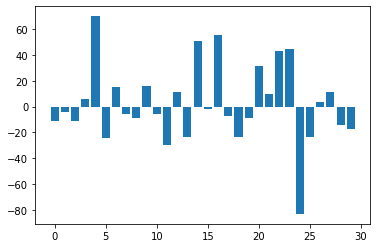

In [12]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [13]:
for i,v in enumerate(importance):
    if v > 2.5:
        print('Feature: %0s, Score: %.2f' % (QUEEN_train_X.columns[i],v))

Feature: colonies_amount, Score: 5.80
Feature: food_fruit, Score: 69.85
Feature: food_txakoli, Score: 15.06
Feature: food_blueberry, Score: 15.91
Feature: hum, Score: 11.19
Feature: lev_mid, Score: 50.62
Feature: rain, Score: 55.12
Feature: rain_max_day, Score: 31.60
Feature: sun, Score: 9.86
Feature: temp_avg, Score: 42.75
Feature: temp_max_abs, Score: 44.75
Feature: wind_avg, Score: 3.64
Feature: wind_max, Score: 11.26


## Train the model

### Using the feature importance variable including the categorical `'month'`

In [24]:
# Model time! (train the model)
model = ols('waspbust_id ~ food_fruit + lev_mid + rain + rain_max_day + temp_avg + C(month)', data=QUEEN_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            waspbust_id   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     16.40
Date:                Wed, 12 May 2021   Prob (F-statistic):           7.99e-43
Time:                        21:28:27   Log-Likelihood:                -4514.4
No. Observations:                1637   AIC:                             9063.
Df Residuals:                    1620   BIC:                             9155.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.4965      2.036      3.

### Other discarded models

#### Using the Feature Importance variables

In [40]:
# Model time! (train the model)
model = ols('waspbust_id ~ food_fruit + lev_mid + rain + rain_max_day + temp_avg + temp_max_abs', data=QUEEN_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            waspbust_id   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     14.51
Date:                Wed, 12 May 2021   Prob (F-statistic):           3.42e-16
Time:                        21:32:12   Log-Likelihood:                -4594.6
No. Observations:                1637   AIC:                             9203.
Df Residuals:                    1630   BIC:                             9241.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       11.0759      2.669      4.150   

#### Using all the numerical variables

In [17]:
# Model time! (train the model)
model3 = ols('waspbust_id ~ colonies_amount + food_fruit + food_apple + food_txakoli + food_kiwi + food_pear + food_blueberry + food_raspberry + freez + hum + lev_max + lev_mid + lev_min + rain + rain_1mm + rain_cum + rain_max_10 + rain_max_day + sun + temp_avg + temp_max_abs + temp_max_avg + temp_min_abs + wind_avg + wind_max + wind_max_avg + population', data=QUEEN_train).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:            waspbust_id   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     9.022
Date:                Wed, 12 May 2021   Prob (F-statistic):           8.07e-34
Time:                        20:40:34   Log-Likelihood:                -4521.8
No. Observations:                1637   AIC:                             9100.
Df Residuals:                    1609   BIC:                             9251.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -4.4437      9.056     

#### Scaling the numerical variables resulting from feature importance

In [18]:
QUEEN_scaled = QUEEN_train_X.copy()
QUEEN_scaled['Y'] = QUEEN_train_Y
QUEEN_scaled

,year_x,municip_code,month,year_offset,colonies_amount,food_fruit,food_apple,food_txakoli,food_kiwi,food_pear,...,sun,temp_avg,temp_max_abs,temp_max_avg,temp_min_abs,wind_avg,wind_max,wind_max_avg,population,Y
0,0.0,0.000000,0.000000,0.0,0.235294,0.000000,0.00,0.0,0.000000,0.0,...,0.833940,0.623088,0.951129,0.711083,0.254998,0.291769,0.147691,0.095833,0.006558,1
1,0.0,0.000000,0.090909,0.0,0.235294,0.000000,0.00,0.0,0.000000,0.0,...,0.833940,0.623088,0.951129,0.711083,0.254998,0.291769,0.147691,0.095833,0.006558,4
2,0.0,0.000000,0.181818,0.0,0.235294,0.000000,0.00,0.0,0.000000,0.0,...,0.833940,0.623088,0.951129,0.711083,0.254998,0.291769,0.147691,0.095833,0.006558,1
3,0.0,0.000000,0.363636,0.0,0.235294,0.000000,0.00,0.0,0.000000,0.0,...,0.833940,0.623088,0.951129,0.711083,0.254998,0.291769,0.147691,0.095833,0.006558,3
4,0.0,0.000000,0.454545,0.0,0.235294,0.000000,0.00,0.0,0.000000,0.0,...,0.833940,0.623088,0.951129,0.711083,0.254998,0.291769,0.147691,0.095833,0.006558,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632,1.0,0.997812,0.636364,1.0,0.000000,0.047273,0.00,0.0,0.090909,0.0,...,0.784698,0.919332,0.617174,0.485367,0.686534,0.601718,0.494382,0.786232,0.000454,2
1633,1.0,0.997812,0.909091,1.0,0.000000,0.047273,0.00,0.0,0.090909,0.0,...,0.784698,0.919332,0.617174,0.485367,0.686534,0.601718,0.494382,0.786232,0.000454,1
1634,1.0,0.997812,1.000000,1.0,0.000000,0.047273,0.00,0.0,0.090909,0.0,...,0.784698,0.919332,0.617174,0.485367,0.686534,0.601718,0.494382,0.786232,0.000454,1
1635,1.0,1.000000,0.000000,1.0,0.000000,0.076364,0.22,0.0,0.000000,0.0,...,0.835538,0.599444,0.649755,0.611768,0.362882,0.316870,0.110781,0.099129,0.416137,2


In [19]:
model4 = ols('Y ~ food_fruit + lev_mid + rain + rain_max_day + temp_avg', data=QUEEN_scaled).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     17.13
Date:                Wed, 12 May 2021   Prob (F-statistic):           1.52e-16
Time:                        20:40:57   Log-Likelihood:                -4595.3
No. Observations:                1637   AIC:                             9203.
Df Residuals:                    1631   BIC:                             9235.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.2806      0.578      5.674   

## Predict

In [41]:
prediction_y_2020 = model.predict(QUEEN_predict)
prediction_y_2020

0      2.913622
1      3.107588
2      2.916617
3      3.274895
4      4.113295
         ...   
106    5.117371
107    2.658712
108    3.486020
109    2.543301
110    3.983859
Length: 111, dtype: float64

## Export result to the competition-required template

In [43]:
QUEEN_predict['nests_2020'] = prediction_y_2020

In [44]:
HEX = QUEEN_predict.loc[:,['municip_code','municip_name','nests_2020']].groupby(by=['municip_code','municip_name'], as_index=False).sum().dropna()
HEX.columns = ['CODIGO MUNICIPIO','NOMBRE MUNICIPIO','NIDOS 2020']

In [48]:
HEX.iloc[-1] = [48020,'Bilbao',0]

In [50]:
# Save the new dataFrame as a .csv in the current working directory
HEX.to_csv('WaspBusters_20210512_OLSyears.csv', index=False)

# Post-analysis

In [51]:
HEX['NIDOS 2020'].sum()

380.2648129177993